In [1]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
df = pd.read_csv('datavisual.csv')
df.head()

,CustID,Premium,Model_Year,Owner_Type,Road side addon,No Claim bonus discount,Electric add on rate,Company,Car Type,RTO,CNGkit,Paymentmode,Total IDV,Seats,Acquisition Channel
0,10000,"33,249",2011,1,1,"1,523",384,Hyundai,Sedan,Pen,0,Digital Wallet,"714,966",8,Direct
1,10001,"28,102",2013,2,0,"1,452",411,Hyundai,Sedan,Navi Mumbai,1,Digital Wallet,"718,209",6,Direct
2,10002,"30,271",2008,1,0,"1,367",317,Hyundai,Sedan,Thane,1,Digital Wallet,"640,333",5,In Direct
3,10003,"26,247",2014,2,0,"1,249",496,Honda,Sedan,Mumbai,1,Net Banking,"617,561",7,In Direct
4,10004,"29,665",2005,1,0,"1,310",447,Hyundai,Sedan,Thane,1,Credit Card,"706,606",7,In Direct


In [3]:
df.dtypes

CustID                      int64
Premium                    object
Model_Year                  int64
Owner_Type                  int64
Road side addon             int64
No Claim bonus discount    object
Electric add on rate        int64
Company                    object
Car Type                   object
RTO                        object
CNGkit                      int64
Paymentmode                object
Total IDV                  object
Seats                       int64
Acquisition Channel        object
dtype: object

In [4]:
numeric_col = ['Premium','No Claim bonus discount','Total IDV']
for column in numeric_col:
    df[column] = df[column].str.replace(',','').astype(float)
print(df.dtypes)

CustID                       int64
Premium                    float64
Model_Year                   int64
Owner_Type                   int64
Road side addon              int64
No Claim bonus discount    float64
Electric add on rate         int64
Company                     object
Car Type                    object
RTO                         object
CNGkit                       int64
Paymentmode                 object
Total IDV                  float64
Seats                        int64
Acquisition Channel         object
dtype: object


In [5]:
sedan = df[(df['Car Type']== 'Sedan') & (df['Model_Year']==2019)]['Total IDV'].median()
Hatchback =  df[(df['Car Type']== 'HatchBack') & (df['Model_Year']==2018)]['Total IDV'].median()
Difference = (sedan - Hatchback)

print(sedan)
print(Hatchback)

print(Difference)

694636.0
710339.0
-15703.0


In [6]:
%pip install matplotlib
%pip install seaborn



Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/50/ce/a6bc93f7a44dd1fd23698698e369e141f4f24e7098d0a5937808afee3f5e/matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/28/27/42f5cac9f5ee15ab65b3fd939e37a115a0a5e367fcabde5b901599daa85a/fonttools-4.49.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.3 kB ? eta


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 219.4 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/294.9 kB 302.7 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 573.4 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 655.9 kB/s eta 0:00:01
   ------------------------------ --

Owner_Type  Paymentmode   
1           Credit Card       29973.525095
            Digital Wallet    29839.934936
            Net Banking       30026.512494
            UPI               29955.950656
2           Credit Card       29980.416863
            Digital Wallet    29995.094322
            Net Banking       29968.254487
            UPI               30000.195155
Name: Premium, dtype: float64


C:\Users\vzvijayk\AppData\Local\Temp\ipykernel_16588\2745689750.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x='Paymentmode',y='Premium',hue='Owner_Type',data=df,color='red')


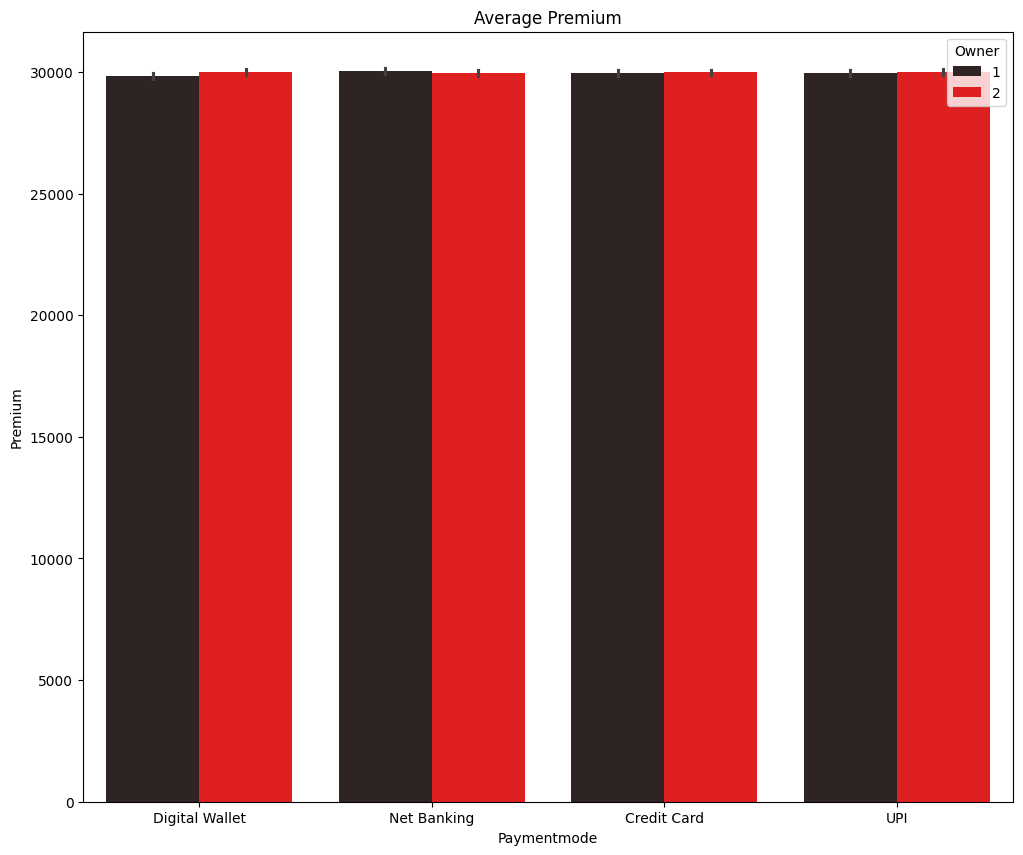

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
average_premium = df.groupby(['Owner_Type','Paymentmode'])['Premium'].mean()

print(average_premium)

plt.figure(figsize=(12,10))
sns.barplot(x='Paymentmode',y='Premium',hue='Owner_Type',data=df,color='red')
plt.title('Average Premium')
plt.xlabel('Paymentmode')
plt.ylabel('Premium')
plt.legend(title='Owner')
plt.xticks(rotation=0)
plt.show()

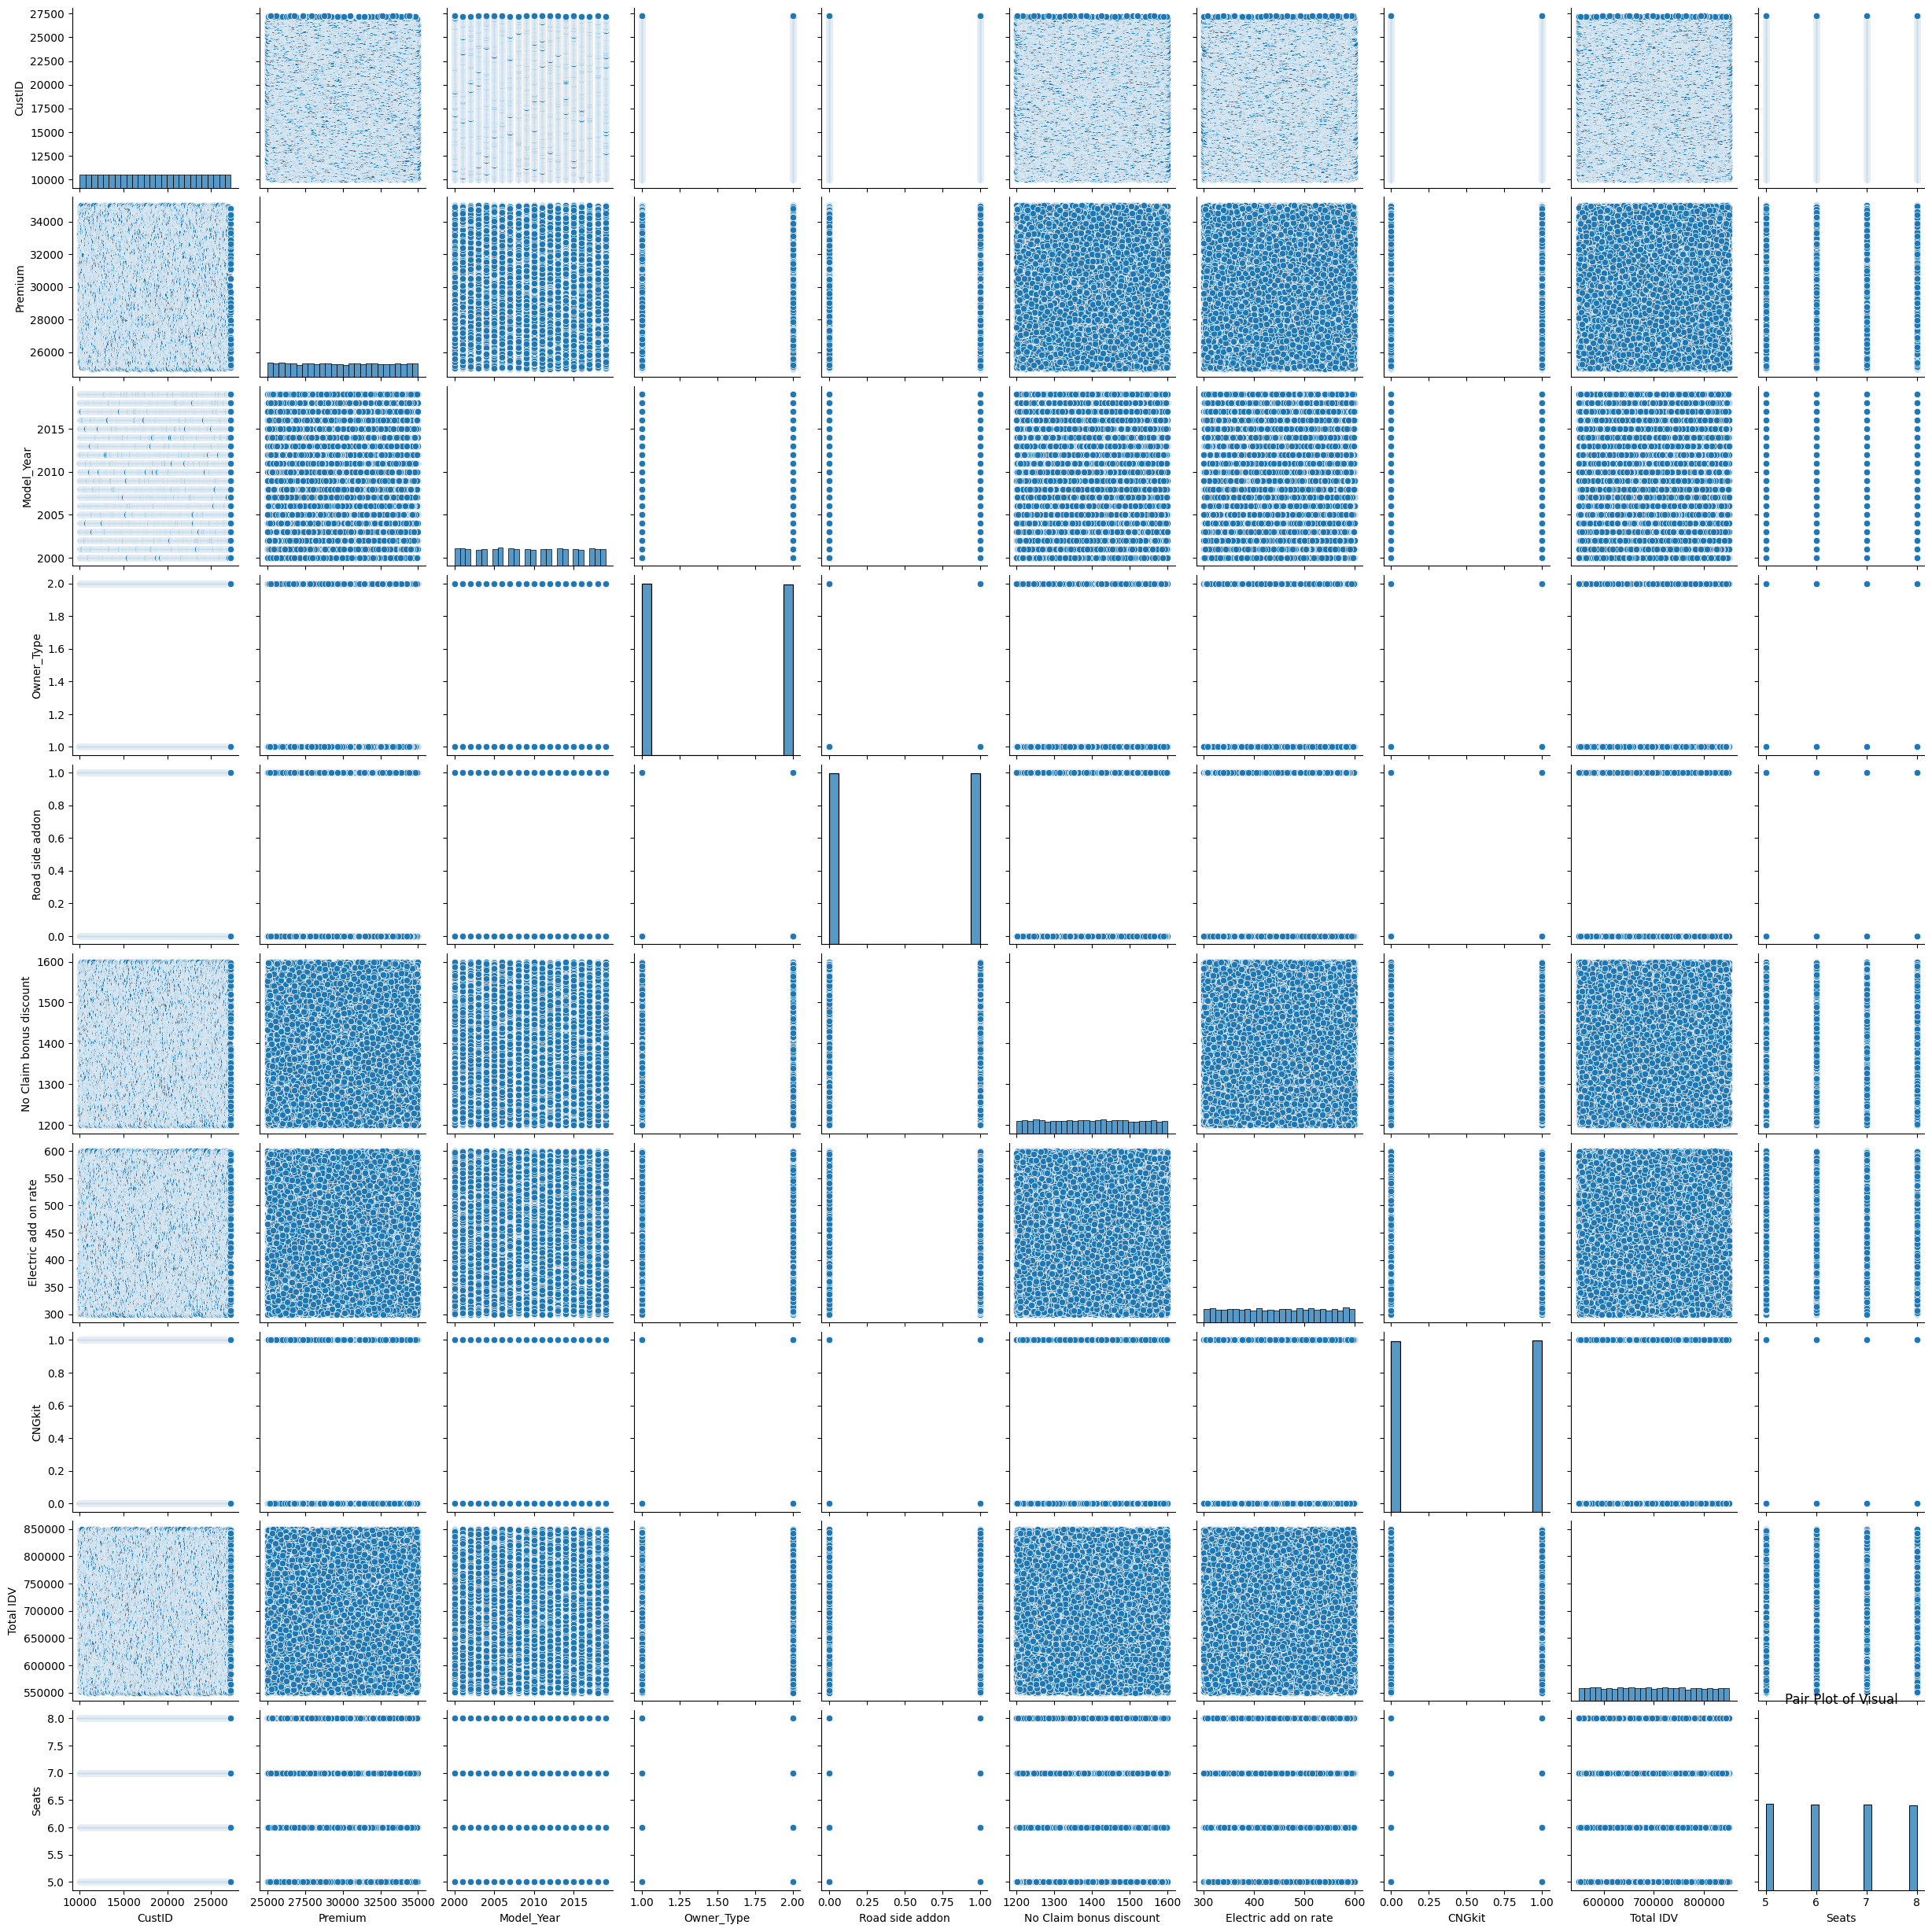

In [8]:
sns.pairplot(df)
plt.title('Pair Plot of Visual')
plt.show()

C:\Users\vzvijayk\AppData\Local\Temp\ipykernel_16588\3418278958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total IDV'], kde=True, hist=True,color='green')


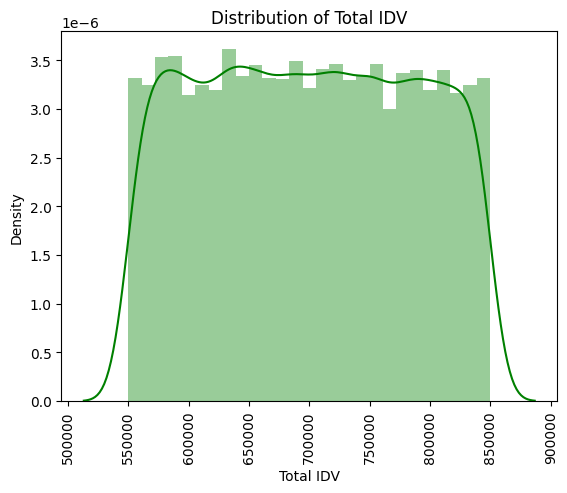

In [9]:
sns.distplot(df['Total IDV'], kde=True, hist=True,color='green')
plt.title('Distribution of Total IDV')
plt.xlabel('Total IDV')
plt.ylabel('Density')
plt.xticks(rotation=90)
plt.show()

Model_Year
2000    403019
2001    404109
2002    381076
2003    365967
2004    384974
2005    386698
2006    416415
2007    393679
2008    382859
2009    380853
2010    369064
2011    387390
2012    387026
2013    403984
2014    388494
2015    392125
2016    370101
2017    398372
2018    388525
2019    380822
Name: Electric add on rate, dtype: int64


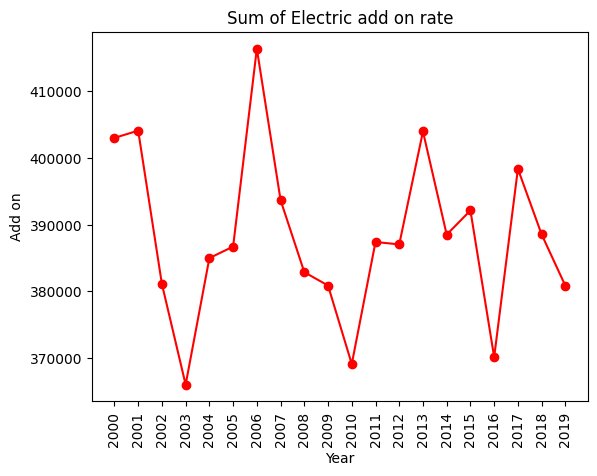

In [10]:
sum_of = df.groupby('Model_Year')['Electric add on rate'].sum()
sum_of.index = sum_of.index.astype(str)
print(sum_of)
plt.plot(sum_of.index,sum_of.values,marker='o',color='red')
plt.title('Sum of Electric add on rate')
plt.xlabel('Year')
plt.ylabel('Add on')
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

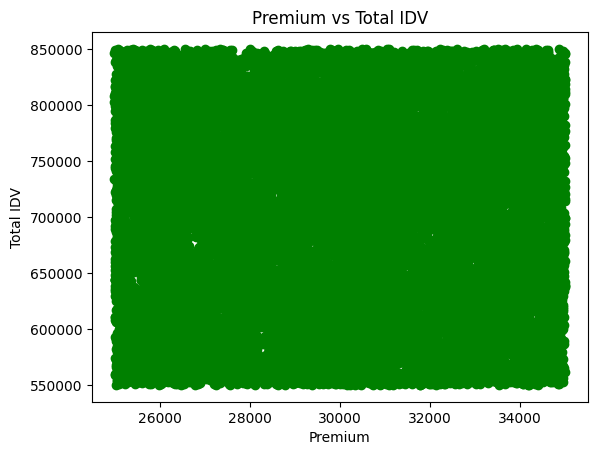

In [11]:
plt.scatter(df['Premium'], df['Total IDV'],color = 'green')
plt.title('Premium vs Total IDV')
plt.xlabel('Premium')
plt.ylabel('Total IDV')
plt.grid(False)
plt.show()